# Viva Real Code Challenge

Implementação do desafio de regressão da Viva Real.

http://vivareal.github.io/data-science-challenge/

Desenvolvido em Python.

# Leitura e analise dos dados

In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

df_train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1,NaN,7bb0edd98f22430a03b6,43347709c539b56b0e08,89562dccfeb1d0394b9a,e546784dabc7c0baa399,c8842986d4a9e0bd9cd0,94e94133f4bdc1794c6b,3.628345,128,...,10,56688.435956,18ff74f43da410c5529f,56688.435956,0.719955,-48.549454,6d1dc6a272b972d037d2,456a29cf32ae45eac03f,5fb1f955b45e38e31789,39.422747
1,2,NaN,7bb0edd98f22430a03b6,d751713988987e933198,de2a35e78a80fd8380ed,e546784dabc7c0baa399,c8842986d4a9e0bd9cd0,94e94133f4bdc1794c6b,1.854321,28,...,2,3939.537719,18ff74f43da410c5529f,3939.537719,0.000000,NaN,a3d2de7675556553a5f0,456a29cf32ae45eac03f,940a99ee47f4073adfe7,30.667440
2,4,NaN,ff59525d9a9237add5ff,90700597393dfce9a46e,2c240a5c20869acbd973,e546784dabc7c0baa399,c8842986d4a9e0bd9cd0,94e94133f4bdc1794c6b,0.719955,348,...,24,2256.125437,18ff74f43da410c5529f,2256.125437,0.000000,NaN,0961e92ec9f13a2edc55,456a29cf32ae45eac03f,5fb1f955b45e38e31789,28.391629
3,5,NaN,23f59d5107f182b8364c,7cdafbcd93f1bccf5080,2547399267ae0ffdef2b,e546784dabc7c0baa399,9a69006ea41dbbc0785b,94e94133f4bdc1794c6b,3.628345,294,...,20,384836.825238,18ff74f43da410c5529f,384836.825238,3.628345,NaN,1cade31f14f9053ed736,456a29cf32ae45eac03f,5fb1f955b45e38e31789,43.442133
4,6,NaN,e60dd4d20e122f2a0017,9bf293624e667dbe6d8a,44885837c518b06e3f98,e546784dabc7c0baa399,954f5773401802900578,94e94133f4bdc1794c6b,3.628345,297,...,20,111345.629879,18ff74f43da410c5529f,111345.629879,1.854321,-49.319686,569725f7d4b38bf384b7,456a29cf32ae45eac03f,940a99ee47f4073adfe7,37.172312


In [29]:
# Vendo o tamanho de cada base
len(df_train), len(df_test)

(59484, 19829)

In [3]:
# Organizando as features para ver melhor o formato dos dados, valores unicos etc
df_count = pd.DataFrame(columns=['feature', 'count', 'type', 'names'])
for feature in df_train.columns:
    values = list(df_train[feature].unique())
    row = [feature, len(values), df_train[feature].dtype, str(values[:50])]
    df_count.loc[len(df_count)] = row  

df_count.sort_values(['count'])

,feature,count,type,names
14,feature_13,1.0,object,['18ff74f43da410c5529f']
5,feature_4,2.0,object,"['e546784dabc7c0baa399', 'f9bddf0425d224ce18e3']"
19,feature_18,3.0,object,"['456a29cf32ae45eac03f', '7a65fd4cef0a01e3974c..."
7,feature_6,3.0,object,"['94e94133f4bdc1794c6b', '7c7c704d16a864767fed..."
20,feature_19,3.0,object,"['5fb1f955b45e38e31789', '940a99ee47f4073adfe7..."
12,feature_11,12.0,int64,"[10, 2, 24, 20, 14, 6, 22, 12, 8, 4, 18, 16]"
6,feature_5,17.0,object,"['c8842986d4a9e0bd9cd0', '9a69006ea41dbbc0785b..."
16,feature_15,19.0,float64,"[0.71995488565400001, 0.0, 3.6283452616400003,..."
10,feature_9,23.0,float64,"[6.1070569524199998, 0.71995488565400001, 0.14..."
8,feature_7,26.0,float64,"[3.6283452616400003, 1.8543208761099996, 0.719..."


In [31]:
def create_features(df):
    # Com base nas analises, vi que a feature_8 tem 365 valores diferentes,
    # baseado nisso imagino que pode ser o dia do ano.
    # Peguei um ano qualquer como base e com isso fui capaz de descobrir dia e mês.
    from datetime import date

    def int_to_day(days):
        return date.fromordinal(date(2015, 1, 1).toordinal() + days - 1).day

    def int_to_month(days):
        return date.fromordinal(date(2015, 1, 1).toordinal() + days - 1).month

    df['feature_8_day'] = df.feature_8.apply(int_to_day)
    df['feature_8_month'] = df.feature_8.apply(int_to_month)

    # A feature_11 possui possui valores divisíveis por 2, gerando números de 1 a 12, o que talvez possa ser o mês ofuscado.
    df['feature_11_month'] = df.feature_11.divide(2)
    
create_features(df_train)
create_features(df_test)

In [5]:
# O possivel mes gerado pela feature 8 e pela feature 11 parecem confirmar a teoria.
df_train[['feature_8_month','feature_11_month']].head()

,feature_8_month,feature_11_month
0,5,5.0
1,1,1.0
2,12,12.0
3,10,10.0
4,10,10.0


In [46]:
# Eles batem em 98% das linhas.
tmp = df_train[df_train.feature_8_month == df_train.feature_11_month]
len(df_train), len(tmp), 100*len(tmp)/len(df_train)

(59484, 58789, 98.83161858651066)

In [7]:
# Achando features que possuem o mesmo valor em todas as linhas
changeless_columns = []
for column in df_train.columns:
    if len(df_train[column].unique()) == 1:
        changeless_columns.append(column)
changeless_columns

['feature_13']

In [8]:
# Vamos guardar os ids para colocar o arquivo com os resultados
df_test_ids = df_test.id.values

# Vamos remover o id que é apenas um identificador e não serve como feature.
# Vamos remover a feature 13, pois ela tem o mesmo valor em todas as linhas.
df_train.drop(['id', 'feature_13'], axis=1, inplace=True)
df_test.drop(['id', 'feature_13'], axis=1, inplace=True)

In [9]:
# Vou trocar o NAN de duas formas:

# - Numericos: Recebem a media geral daquela coluna, importante ser uma media geral
#   e nao somente da base treino para evitar overfiting.
# - Categoricos: Como valores categoricos não possuem media, vamos trocar pela moda, que é o valor mais comum.
from pandas.core.common import is_numeric_dtype

def fill_na(df_train, df_test):
    for column in df_test.columns:
        if is_numeric_dtype(df_test[column].dtype):
            general_mean = pd.concat([df_train[column], df_test[column]], ignore_index=True).mean()
            df_train[column].fillna(general_mean, inplace=True)
            df_test[column].fillna(general_mean, inplace=True)
        else:
            general_mode = pd.concat([df_train[column], df_test[column]], ignore_index=True).mode()
            df_train[column].fillna(general_mode, inplace=True)
            df_test[column].fillna(general_mode, inplace=True)
# fill_na(df_train, df_test)

# Após testar com media/moda e apenas substituindo por 0, tive melhor score no cross validation substituindo por 0.
# Então mantive assim.
df_train.fillna(0, axis=1, inplace=True)
df_test.fillna(0, axis=1, inplace=True)

In [10]:
# Trocando as features categoricas por números com o Label Encoder
# isso é pre requisito para a maioria dos classificadores.

import numpy as np
from sklearn.preprocessing import LabelEncoder

def encode_string_columns(df_train, df_test):
    encoded_columns = []
    for column in df_test.columns:
        if df_test[column].dtype == np.object:
            train_values = list(df_train[column].values)
            test_values = list(df_test[column].values)
            encoder = LabelEncoder()
            encoder.fit(np.unique(train_values + test_values))
            df_train[column] = encoder.transform(train_values)
            df_test[column] = encoder.transform(test_values)
            encoded_columns.append(column)
    return encoded_columns

# Imprimindo categoricas que foram tratadas
encode_string_columns(df_train, df_test)

['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_17',
 'feature_18',
 'feature_19']

In [11]:
# Pegando somente as features.
features = df_train.columns.difference(['target'])

# Vamos colocar os valores das features X e das saídas em y
X = df_train[features].values
y = df_train['target'].values

features

Index(['feature_0', 'feature_1', 'feature_10', 'feature_11',
       'feature_11_month', 'feature_12', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_8_day', 'feature_8_month', 'feature_9'],
      dtype='object')

In [12]:
# Gerando funcão de score usada no desafio
import numpy as np
from sklearn.metrics import make_scorer

# Median Absolute Percentage Error (MdAPE)
def mdape(ytrue, ypred):
     return np.median( np.abs(ytrue - ypred) / ytrue )
    
scorer = make_scorer(mdape, False)

In [14]:
# Testando um modelo linear para ver o resultado.
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

classifier_linear = LinearRegression(normalize=True)
scores = cross_val_score(classifier_linear, X, y, scoring=scorer, cv=5)
scores, scores.mean()

# Com media e moda: -0.086726606547216603, 
# Com 0 no NAN:

(array([-0.08683096, -0.08740561, -0.08519264, -0.087251  , -0.08616367]),
 -0.08656877759767502)

In [15]:
# Vamos com um modelo não linear agora.
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

classifier = RandomForestRegressor(n_jobs=-1,
                                   random_state=1986,
                                   bootstrap=False,
                                   max_depth=30,
                                   max_features=0.35,
                                   n_estimators=100) 
scores = cross_val_score(classifier, X, y, scoring=scorer, cv=5)
scores, scores.mean()

# Com media e moda no NAN: -0.034630119944758578
# Com 0 no NAN:

(array([-0.03483076, -0.0342098 , -0.0346549 , -0.03465876, -0.03456913]),
 -0.03458467083840143)

O modelo não linear ficou bem melhor, vamos usar ele então.

In [20]:
# Vamos dar o fit com todos os dados, para termos o classificador pronto
classifier.fit(X, y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=22,
           max_features=0.20417686877330429, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=267, n_jobs=-1,
           oob_score=False, random_state=1986, verbose=0, warm_start=False)

In [21]:
# Vamos ver a importância de cada uma das features
features_importance = zip(classifier.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

feature_14: 23.851854%
feature_15: 13.375844%
feature_12: 9.936883%
feature_9: 8.837547%
feature_7: 7.466354%
feature_5: 4.646592%
feature_16: 3.708535%
feature_10: 3.545121%
feature_3: 3.446933%
feature_17: 3.088188%
feature_1: 3.058366%
feature_8: 2.971948%
feature_8_day: 2.731672%
feature_2: 2.106591%
feature_4: 1.456322%
feature_11: 1.176820%
feature_11_month: 1.176637%
feature_8_month: 1.168242%
feature_0: 1.062831%
feature_19: 0.802569%
feature_6: 0.222721%
feature_18: 0.161431%


In [22]:
# Vamos gerar os dados da curva de aprendizado para analisarmos.
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, scoring=scorer, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

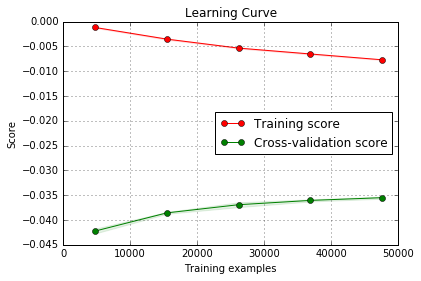

In [23]:
# Vamos plotar esse dados para melhor visualização.
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="center right")

No geral a precisão do modelo está muito boa e com um baixo desvio padrão no cross validation, o que mostra que não temos nem  underfitting e nem overfitting.

Também podemos ver que conforme adicionamos dados no treinamento (linha vermelha) o modelo perde um pouco da precisão, melhores features podem ajudar o modelo a generalizar melhor ainda.

Conforme colocamos mais dados, o cross validation (linha verde) do modelo tende a melhorar, com mais dados ainda é bem provavel que o modelo melhore ainda mais.

In [27]:
# Muitas vezes uma feature ruim pode mais atrapalhar do que ajudar um modelo,
# vamos rodar o feature elimination para tentar achar essas features.
from sklearn.feature_selection import RFECV

selector = RFECV(classifier, 1, cv=5, scoring=scorer)
selector.fit(X, y)

features[selector.support_ == False], np.max(selector.grid_scores_)

(Index([], dtype='object'), -0.034465086440081574)

O feature elimination executado, tirou feature por feature e rodou o cross validation.
O melhor resultado encontrado foi sem tirar nenhuma feature, pois todas estão sendo usadas e contribuem para nosso score.

In [28]:
# O classificar possui diversos parametros diferentes, uma forma de procurar os
# melhores parametros é atraves do GridSearchCV do sklearn.
# Outra forma, que considero mais eficiente, é a otimização bayesiana, pois ela busca de forma mais inteligente 
# do que a simples "força bruta" aplicada pelo GridSearch.
from bayes_opt import BayesianOptimization

def model_cv(**params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    return cross_val_score(classifier.set_params(**params), X, y, scoring=scorer, cv=5).mean()

param_grid = {
    'max_depth': (10, 30),
    'max_features': (0.1, 0.5),
    'n_estimators': (100, 500)
}

bo = BayesianOptimization(model_cv, param_grid)
bo.maximize(5, 15)
print('BayesianOptimization) Score: %.16f   Params: %s' % (abs(bo.res['max']['max_val']),
                                                           bo.res['max']['max_params']))
classifier.set_params(**bo.res['max']['max_params'])

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 00m44s |   -0.04239 |     10.9001 |         0.3560 |       154.8984 | 
    2 | 01m23s |   -0.04182 |     10.8667 |         0.3972 |       260.1035 | 
    3 | 01m17s |   -0.04381 |     15.4207 |         0.1232 |       495.4720 | 
    4 | 00m59s |   -0.03546 |     19.5439 |         0.3048 |       127.4215 | 
    5 | 04m04s |   -0.03447 |     29.7126 |         0.2465 |       471.7642 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 03m44s |   -0.03490 |     29.1590 |         0.2202 |       479.3488 | 
    7 | 03m23s |   -0.03446 |     28.3369 |         0.2688 |       401.0347 | 
    8 | 03m17s |   -0.03442 |     30.0000 |         0.2371 |       386.2869 | 
    9 | 03m29s | 

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30.0,
           max_features=0.2858824659528782, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=252.6464822750103,
           n_jobs=-1, oob_score=False, random_state=1986, verbose=0,
           warm_start=False)

Com esses melhores parâmetros encontrados mudamos nosso score de 0.03458 para 0.03430. Esse é então nosso classificador final para validar a base de teste.

In [44]:
classifier = RandomForestRegressor(n_jobs=-1,
                                   random_state=1986,
                                   bootstrap=False,
                                   max_depth=30,
                                   max_features=0.285,
                                   n_estimators=252) 

scores = cross_val_score(classifier, X, y, scoring=scorer, cv=5)
scores, scores.mean()

(array([-0.03432451, -0.03429006, -0.03455304, -0.03401268, -0.0343274 ]),
 -0.034301534661179731)

In [45]:
classifier.fit(X, y)

y_pred = classifier.predict(df_test[features])
result = pd.DataFrame(columns=['id', 'target'])

result['id'] = df_test_ids
result['target'] = y_pred
result.to_csv('result.csv', index=False)